# Setup

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

# Dataset

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_train.csv', sep = ',')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_test.csv', sep = ',')

## Train data

In [3]:
train.head(10)

,patient,x,y,z,heartRate,timestamp,tsDate
0,1502,23,569,878,-1,1568073600000,2019-09-10 00:00:00.003
1,1502,23,571,878,-1,1568073601000,2019-09-10 00:00:01.014
2,1502,23,570,878,-1,1568073602000,2019-09-10 00:00:02.025
3,1502,23,570,878,-1,1568073603000,2019-09-10 00:00:03.035
4,1502,23,570,878,-1,1568073604000,2019-09-10 00:00:04.046
5,1502,23,570,879,-1,1568073605000,2019-09-10 00:00:05.057
6,1502,23,569,879,-1,1568073606000,2019-09-10 00:00:06.066
7,1502,22,570,879,-1,1568073607000,2019-09-10 00:00:07.078
8,1502,23,570,879,-1,1568073608000,2019-09-10 00:00:08.088
9,1502,24,570,878,-1,1568073609000,2019-09-10 00:00:09.099


In [4]:
train.tail(10)

,patient,x,y,z,heartRate,timestamp,tsDate
943512,4506,-636,-395,-657,57,1572479989000,2019-10-30 23:59:49.272
943513,4506,-634,-398,-656,57,1572479990000,2019-10-30 23:59:50.292
943514,4506,-636,-398,-654,57,1572479991000,2019-10-30 23:59:51.293
943515,4506,-637,-396,-656,57,1572479992000,2019-10-30 23:59:52.294
943516,4506,-636,-397,-654,56,1572479993000,2019-10-30 23:59:53.314
943517,4506,-636,-399,-654,57,1572479994000,2019-10-30 23:59:54.315
943518,4506,-639,-396,-654,57,1572479995000,2019-10-30 23:59:55.316
943519,4506,-638,-396,-655,57,1572479996000,2019-10-30 23:59:56.336
943520,4506,-637,-396,-655,58,1572479997000,2019-10-30 23:59:57.337
943521,4506,-636,-399,-656,58,1572479998000,2019-10-30 23:59:58.338


In [5]:
train.shape

(943522, 7)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943522 entries, 0 to 943521
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patient    943522 non-null  int64 
 1   x          943522 non-null  int64 
 2   y          943522 non-null  int64 
 3   z          943522 non-null  int64 
 4   heartRate  943522 non-null  int64 
 5   timestamp  943522 non-null  int64 
 6   tsDate     943522 non-null  object
dtypes: int64(6), object(1)
memory usage: 50.4+ MB


In [7]:
train['patient'].unique()

array([1502, 1503, 1505, 1507, 1509, 3506, 3507, 3508, 3509, 4502, 4504,
       4505, 4506])

In [8]:
len(train['patient'].unique())

13

## Test data

In [9]:
test.head(10)

,patient,timestamp,tsDate,x,y,z,heartRate
0,1004,1567224000000,2019-08-31 04:00:00.004,-24,749,-626,77
1,1004,1567224010000,2019-08-31 04:00:10.022,-206,930,-63,77
2,1004,1567224020000,2019-08-31 04:00:20.041,-139,763,-577,72
3,1004,1567224030000,2019-08-31 04:00:30.059,-503,441,-557,73
4,1004,1567224040000,2019-08-31 04:00:40.060,-278,705,-396,78
5,1004,1567224050000,2019-08-31 04:00:50.079,240,839,-310,79
6,1004,1567224060000,2019-08-31 04:01:00.099,-671,318,-213,80
7,1004,1567224070000,2019-08-31 04:01:10.118,-45,296,-927,79
8,1004,1567224080000,2019-08-31 04:01:20.136,102,294,-888,86
9,1004,1567224090000,2019-08-31 04:01:30.145,15,635,-671,87


In [10]:
test.tail(10)

,patient,timestamp,tsDate,x,y,z,heartRate
722777,4002,1571086695000,2019-10-14 20:58:15.441,-502,-133,-862,76
722778,4002,1571086705000,2019-10-14 20:58:25.459,-501,-133,-862,76
722779,4002,1571086715000,2019-10-14 20:58:35.471,-500,-132,-863,74
722780,4002,1571086725000,2019-10-14 20:58:45.488,-501,-133,-863,77
722781,4002,1571086735000,2019-10-14 20:58:55.507,-502,-133,-863,75
722782,4002,1571086745000,2019-10-14 20:59:05.521,-501,-134,-863,76
722783,4002,1571086755000,2019-10-14 20:59:15.539,-500,-133,-863,78
722784,4002,1571086765000,2019-10-14 20:59:25.557,-500,-133,-863,79
722785,4002,1571086775000,2019-10-14 20:59:35.570,-500,-134,-863,78
722786,4002,1571086785000,2019-10-14 20:59:45.577,-500,-134,-863,77


In [11]:
test.shape

(722787, 7)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722787 entries, 0 to 722786
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patient    722787 non-null  int64 
 1   timestamp  722787 non-null  int64 
 2   tsDate     722787 non-null  object
 3   x          722787 non-null  int64 
 4   y          722787 non-null  int64 
 5   z          722787 non-null  int64 
 6   heartRate  722787 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 38.6+ MB


In [13]:
test['patient'].unique()

array([1004, 1006, 3001, 3006, 4002])

In [14]:
len(test['patient'].unique())

5

## Inspect and cleanup

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.020357e+01,2.097376e+01,-1.000000e+00,6.100000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


In [16]:
hr = train['heartRate']
bad_hr = hr == -1
hr[bad_hr] = np.median(train['heartRate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.314050e+01,1.488472e+01,3.400000e+01,6.300000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


In [18]:
train.isna().sum()

patient      0
x            0
y            0
z            0
heartRate    0
timestamp    0
tsDate       0
dtype: int64

## Feature engineering

In [19]:
df = train[['x', 'y', 'z', 'heartRate']]

In [20]:
df = df[slice(0, len(df), 10)]

In [21]:
df = df.reset_index(drop=True)

## Split the data

In [32]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[            : int(n*0.8)]
valid_df = df[int(n*0.8) :            ]

In [33]:
train_df.shape

(75482, 4)

In [34]:
valid_df.shape

(18871, 4)

## Normalize the data

In [35]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
valid_df = (valid_df - train_mean) / train_std

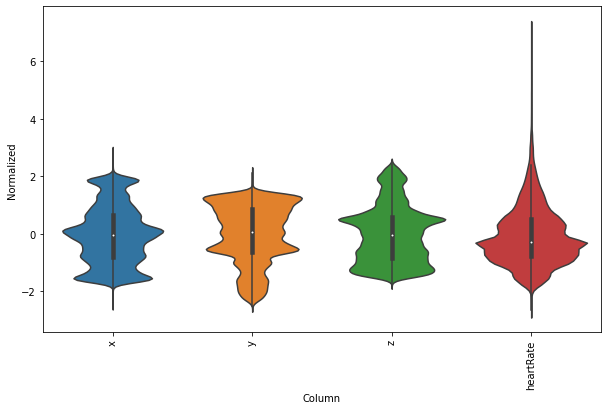

In [36]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [37]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,75482.0,-6.992572e-16,1.0,-2.424902,-0.773337,0.025471,0.662429,2.818688
y,75482.0,2.702867e-15,1.0,-2.505332,-0.603990,0.076392,0.881666,2.115674
z,75482.0,1.277907e-15,1.0,-1.709743,-0.856068,-0.061523,0.644329,2.381243
heartRate,75482.0,-1.418380e-15,1.0,-2.307806,-0.701422,-0.165961,0.570299,7.196634


# Data windowing

In [38]:
def split(data, win_size=30, win_shift=5, offset=1):
  
  rows = np.arange(win_size, len(train_df) - win_shift- 1, win_shift)
  
  samples = np.zeros((len(rows), win_size, df.shape[-1]))
  
  targets = np.zeros((len(rows),))
  
  for j, row in enumerate(rows):
    samples[j] = train_df[j * win_shift: row]
    targets[j] = train_df[row: row + offset]['x']
   
  return samples, targets